## Import Dataset

In [31]:
import pandas as pd
df = pd.read_csv('Datasets/label.csv')

# Train model KNN

Accuracy: 99.47%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.99      1.00      1.00       149

    accuracy                           0.99       188
   macro avg       1.00      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188


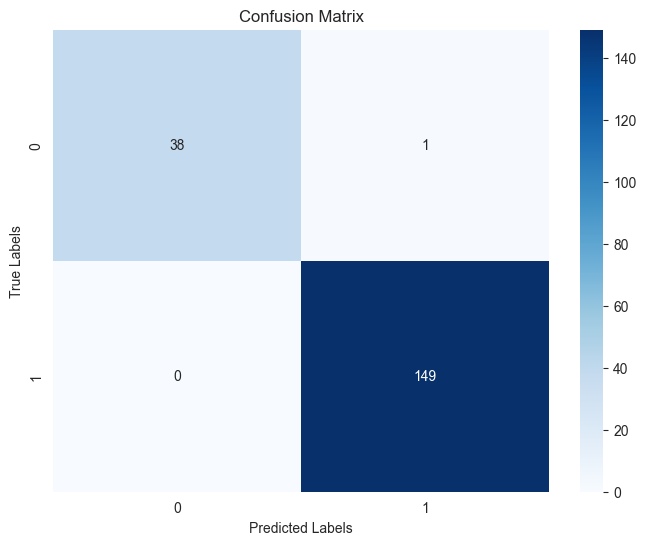

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features (X) and labels (y)
X = df.drop(['Label'], axis=1)  # Features
y = df['Label']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
k = 3  # Number of neighbors to consider (you can adjust this parameter)
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Train Test NN 

Epoch 1/10
18/18 - 5s - loss: 3.4978 - accuracy: 0.7776 - val_loss: 1.4253 - val_accuracy: 0.7553 - 5s/epoch - 263ms/step
Epoch 2/10
18/18 - 0s - loss: 0.2320 - accuracy: 0.9502 - val_loss: 0.0017 - val_accuracy: 1.0000 - 152ms/epoch - 8ms/step
Epoch 3/10
18/18 - 0s - loss: 0.0530 - accuracy: 0.9929 - val_loss: 0.0152 - val_accuracy: 0.9947 - 142ms/epoch - 8ms/step
Epoch 4/10
18/18 - 0s - loss: 0.0435 - accuracy: 0.9929 - val_loss: 0.0274 - val_accuracy: 0.9787 - 146ms/epoch - 8ms/step
Epoch 5/10
18/18 - 0s - loss: 0.0442 - accuracy: 0.9929 - val_loss: 0.0434 - val_accuracy: 0.9734 - 139ms/epoch - 8ms/step
Epoch 6/10
18/18 - 0s - loss: 0.0300 - accuracy: 0.9929 - val_loss: 0.0017 - val_accuracy: 1.0000 - 141ms/epoch - 8ms/step
Epoch 7/10
18/18 - 0s - loss: 0.0580 - accuracy: 0.9947 - val_loss: 0.2143 - val_accuracy: 0.9362 - 201ms/epoch - 11ms/step
Epoch 8/10
18/18 - 0s - loss: 0.0599 - accuracy: 0.9840 - val_loss: 0.1649 - val_accuracy: 0.9628 - 148ms/epoch - 8ms/step
Epoch 9/10
18/18

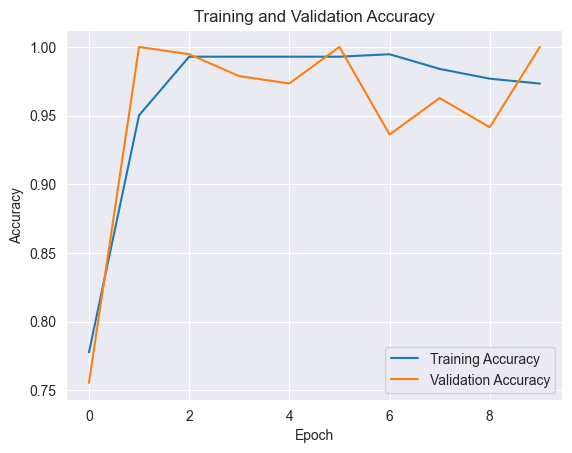

6/6 [==============================] - 0s 5ms/step - loss: 0.0595 - accuracy: 0.9894
Test Loss: 0.05953013524413109
Test Accuracy: 0.9893617033958435
6/6 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.99      1.00      0.99       147

    accuracy                           0.99       188
   macro avg       0.99      0.98      0.98       188
weighted avg       0.99      0.99      0.99       188


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset (assuming df is loaded from 'label.csv')
# df = pd.read_csv('label.csv')

# Separate features (X) and labels (y)
X = df.drop(['Label'], axis=1)
y = df['Label']

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the model
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val),verbose=2)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Make predictions on test data
y_pred = (nn_model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Train Test SVM model

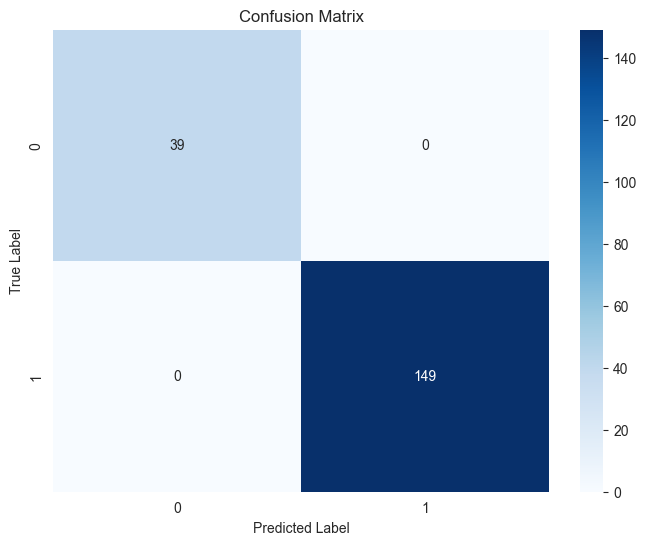

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       149

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Separate features (X) and target variable (y)
X = df.drop(columns=['Label'])  # Features (assuming 9 columns)
y = df['Label']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Multi-Class SVM classifier
svm_model = SVC(kernel='linear')

# Train the classifier
svm_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("Classification Report:")
print(class_report)

# Save Model

In [36]:
import pickle

# Save the trained model to a file
model_filename = 'Model/model.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(knn_model, model_file)

print(f"Model saved as {model_filename}")

Model saved as Model/model.pkl
